In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [34]:
img1 = cv2.imread('img1.jpeg',0)
img2 = cv2.imread('img2.jpeg',0)

In [35]:
# Initiate SIFT detector
orb = cv2.ORB_create()

In [36]:
# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [37]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [38]:
# Match descriptors.
matches = bf.match(des1,des2)

In [39]:
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

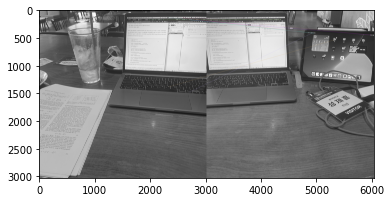

(<matplotlib.image.AxesImage at 0x18c965e40>, None)

In [58]:
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=2)
plt.imshow(img3),plt.show()

In [63]:
# 호모그래피 계산
# DMatch 객체에서 queryIdx와 trainIdx를 받아와서 크기와 타입 변환하기
pts1 = np.array([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2).astype(np.float32)
pts2 = np.array([kp1[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2).astype(np.float32)
                
H, M = cv2.findHomography(pts1, pts2, cv2.USAC_MAGSAC) # pts1과 pts2의 행렬 주의 (N,1,2)

(< cv2.KeyPoint 0x18d53b8d0>,
 < cv2.KeyPoint 0x18d53b1b0>,
 < cv2.KeyPoint 0x18a2d45a0>,
 < cv2.KeyPoint 0x18a2d4450>,
 < cv2.KeyPoint 0x18c73e2e0>,
 < cv2.KeyPoint 0x18c73ff00>,
 < cv2.KeyPoint 0x18c73ffc0>,
 < cv2.KeyPoint 0x18c73e310>,
 < cv2.KeyPoint 0x18c73e040>,
 < cv2.KeyPoint 0x18d528c00>,
 < cv2.KeyPoint 0x18d528c30>,
 < cv2.KeyPoint 0x18d528d50>,
 < cv2.KeyPoint 0x18d528d80>,
 < cv2.KeyPoint 0x18d528d20>,
 < cv2.KeyPoint 0x18c717bd0>,
 < cv2.KeyPoint 0x18c7174e0>,
 < cv2.KeyPoint 0x18c717a20>,
 < cv2.KeyPoint 0x10f4c3c90>,
 < cv2.KeyPoint 0x10f4c34e0>,
 < cv2.KeyPoint 0x18a2abbd0>,
 < cv2.KeyPoint 0x18a2abed0>,
 < cv2.KeyPoint 0x18a2abcc0>,
 < cv2.KeyPoint 0x18c77c9c0>,
 < cv2.KeyPoint 0x18c77c780>,
 < cv2.KeyPoint 0x18c77c990>,
 < cv2.KeyPoint 0x18c77f030>,
 < cv2.KeyPoint 0x18c77f060>,
 < cv2.KeyPoint 0x18c77f270>,
 < cv2.KeyPoint 0x18c77f0f0>,
 < cv2.KeyPoint 0x18c77cc00>,
 < cv2.KeyPoint 0x18c77e9d0>,
 < cv2.KeyPoint 0x18c77eee0>,
 < cv2.KeyPoint 0x18c77c750>,
 < cv2.Key

In [62]:
cv2.__version__

'4.6.0'